<a href="https://colab.research.google.com/github/conste11ations/ml3253-2021/blob/main/Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
 
drive.mount('/content/drive/')
 
path = '/content/drive/MyDrive/Colab Notebooks/ML assignment/Major_Crime_Indicators.csv'
data = pd.read_csv(path)
data.head()

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.859749e+06,5.423033e+06,10182,GO-20142103239,D23,2014/05/18 04:00:00+00,2014/05/18 04:00:00+00,House,1430,100,Assault,2014,May,18,138,Sunday,12,2014.0,May,18.0,138.0,Sunday,12,Assault,1,West Humber-Clairville (1),-79.588477,43.725321,1
1,-8.861050e+06,5.426864e+06,10298,GO-20142111528,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Outside,1430,100,Assault,2014,May,19,139,Monday,21,2014.0,May,19.0,139.0,Monday,20,Assault,1,West Humber-Clairville (1),-79.600166,43.750187,2
2,-8.861412e+06,5.422084e+06,10300,GO-20142111859,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Apartment,2120,200,B&E,2014,May,19,139,Monday,22,2014.0,May,19.0,139.0,Monday,22,Break and Enter,1,West Humber-Clairville (1),-79.603420,43.719158,3
3,-8.859955e+06,5.424372e+06,10345,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,100,Assault With Weapon,2014,May,20,140,Tuesday,14,2014.0,May,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,4
4,-8.859955e+06,5.424372e+06,10346,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,110,Assault Bodily Harm,2014,May,20,140,Tuesday,14,2014.0,May,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242879 entries, 0 to 242878
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    242879 non-null  float64
 1   Y                    242879 non-null  float64
 2   Index_               242879 non-null  int64  
 3   event_unique_id      242879 non-null  object 
 4   Division             242879 non-null  object 
 5   occurrencedate       242879 non-null  object 
 6   reporteddate         242879 non-null  object 
 7   premises_type        242879 non-null  object 
 8   ucr_code             242879 non-null  int64  
 9   ucr_ext              242879 non-null  int64  
 10  offence              242879 non-null  object 
 11  reportedyear         242879 non-null  int64  
 12  reportedmonth        242879 non-null  object 
 13  reportedday          242879 non-null  int64  
 14  reporteddayofyear    242879 non-null  int64  
 15  reporteddayofweek

In [ ]:
 # drop X and Y
 # obtain only unique event_unique_id
 # fill in missing values for occurrence columns
 # drop occurrencedate and reporteddate
 # drop Neighbourhood because same as Hood_ID
 # MCI is just a classification of crime

In [ ]:
unique_data = data.drop(['X', 'Y', 'Index_'], axis=1).drop_duplicates(subset=['event_unique_id'])
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211366 entries, 0 to 242878
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_unique_id      211366 non-null  object 
 1   Division             211366 non-null  object 
 2   occurrencedate       211366 non-null  object 
 3   reporteddate         211366 non-null  object 
 4   premises_type        211366 non-null  object 
 5   ucr_code             211366 non-null  int64  
 6   ucr_ext              211366 non-null  int64  
 7   offence              211366 non-null  object 
 8   reportedyear         211366 non-null  int64  
 9   reportedmonth        211366 non-null  object 
 10  reportedday          211366 non-null  int64  
 11  reporteddayofyear    211366 non-null  int64  
 12  reporteddayofweek    211366 non-null  object 
 13  reportedhour         211366 non-null  int64  
 14  occurrenceyear       211306 non-null  float64
 15  occurrencemonth  

In [ ]:
missing_year = unique_data.loc[unique_data['occurrenceyear'].isnull()]
missing_month = unique_data.loc[unique_data['occurrencemonth'].isnull()]
missing_day = unique_data.loc[unique_data['occurrenceday'].isnull()]
missing_doy = unique_data.loc[unique_data['occurrencedayofyear'].isnull()]
missing_dow = unique_data.loc[unique_data['occurrencedayofweek'].isnull()]
print(missing_year.equals(missing_month)) #need to convert to string
print(missing_year.equals(missing_day))
print(missing_year.equals(missing_doy))
print(missing_year.equals(missing_dow)) # convert to string

True
True
True
True


In [ ]:
from datetime import datetime
unique_data.loc[unique_data['occurrenceyear'].isnull()]
s = "1990/02/05 05:00:00+00"
f = "%Y/%m/%d %H:%M:%S+%f"
out = datetime.strptime(s, f)
print(out)
print(out.strftime('%Y'))
print(out.timetuple().tm_yday)
print(type(out.timetuple().tm_yday))
print(type(out.weekday())) #monday is 0
# print(row[''])

1990-02-05 05:00:00
1990
36
<class 'int'>
<class 'int'>


In [ ]:
f = '%Y/%m/%d %H:%M:%S+%f'
#values = pd.DataFrame(columns=['occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofyear', 'occurrencedayofweek'])

for row in missing_year.itertuples():
  occurrence_date = datetime.strptime(row.occurrencedate, f)
  values = {
    'occurrenceyear': int(occurrence_date.strftime('%Y')),
    'occurrencemonth': int(occurrence_date.strftime('%m')), 
    'occurrenceday': int(occurrence_date.strftime('%d')), 
    'occurrencedayofyear': occurrence_date.timetuple().tm_yday, 
    'occurrencedayofweek': occurrence_date.weekday()
  }
  unique_data.fillna(value=values, limit=1, inplace=True)
 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211366 entries, 0 to 242878
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_unique_id      211366 non-null  object 
 1   Division             211366 non-null  object 
 2   occurrencedate       211366 non-null  object 
 3   premises_type        211366 non-null  object 
 4   ucr_code             211366 non-null  int64  
 5   ucr_ext              211366 non-null  int64  
 6   offence              211366 non-null  object 
 7   reportedyear         211366 non-null  int64  
 8   reportedmonth        211366 non-null  object 
 9   reportedday          211366 non-null  int64  
 10  reporteddayofyear    211366 non-null  int64  
 11  reporteddayofweek    211366 non-null  object 
 12  reportedhour         211366 non-null  int64  
 13  occurrenceyear       211366 non-null  float64
 14  occurrencemonth      211366 non-null  object 
 15  occurrenceday    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


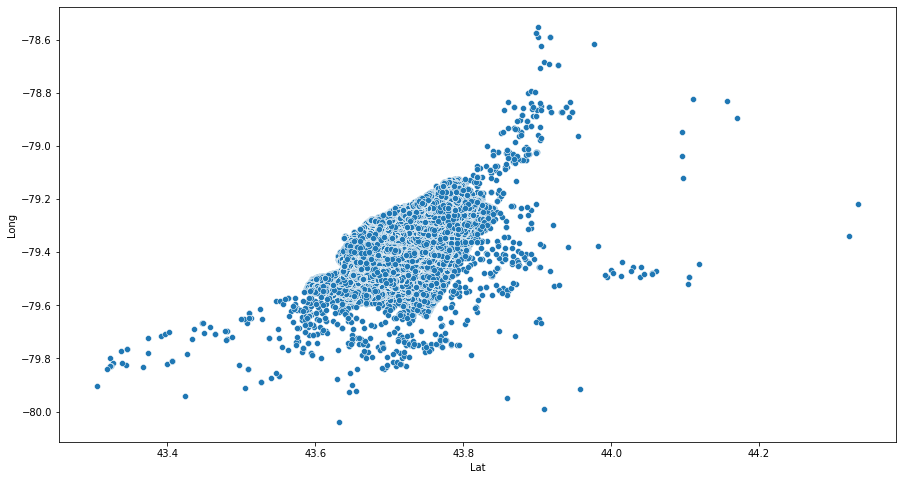

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(data['Lat'], data['Long'])

In [ ]:
import folium
from folium.plugins import HeatMap

# create the map
temp = unique_data.loc[unique_data['occurrenceyear'] == 2020.00].loc[unique_data['occurrencemonth'] == 'March'].loc[unique_data['MCI'] == 'Assault']

#Make the list of Lat an Lng
lat = temp['Lat'].tolist()
lng = temp['Long'].tolist()

#Create the Map
map = folium.Map(
    location=[43.655321, -79.388477],
    tiles='cartodbdark_matter',
    zoom_start=12
)
HeatMap(list(zip(lat, lng))).add_to(map)
map

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(unique_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

unique_data_without_MCI = train_set[['Lat', 'Long']].copy()

predicted_MCI = train_set['ucr_code'].copy()

lin_reg = LinearRegression()
lin_reg.fit(unique_data_without_MCI, predicted_MCI)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(unique_data_without_MCI, predicted_MCI)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
linreg_scores = cross_val_score(lin_reg, unique_data_without_MCI, predicted_MCI,
                         scoring="neg_mean_squared_error", cv=10)
linreg_rmse_scores = np.sqrt(-linreg_scores)

In [ ]:
treereg_scores = cross_val_score(tree_reg, unique_data_without_MCI, predicted_MCI,
                         scoring="neg_mean_squared_error", cv=10)
treereg_rmse_scores = np.sqrt(-treereg_scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(linreg_rmse_scores)
display_scores(treereg_rmse_scores)

Scores: [330.35740548 328.78955053 329.44535679 329.40315146 328.08282121
 330.30761904 329.48880941 329.95665706 329.29275844 329.04520942]
Mean: 329.41693388337364
Standard deviation: 0.6559220221616798
Scores: [319.14336263 317.30064307 321.16892486 319.17217582 316.46919841
 319.75372257 318.80224912 316.44166572 318.91424662 315.99285115]
Mean: 318.31590399852007
Standard deviation: 1.5990592512325614
